# Import Section

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures
np.set_printoptions(precision=2)
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



import pickle as pkl

# Dataset:Medical Cost Personal
https://www.kaggle.com/datasets/mirichoi0218/insurance

*   ***About Dataset***
Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. The publisher, Packt Publishing does not make its datasets available online compared to the ones in the books they have published. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance




In [107]:
cols=["age","sex","bmi","children","smoker","region","charges"]
df = pd.read_csv("insurance.csv", names=cols)
df.replace({'sex': {'male': 1, 'female': 0},
            'smoker': {'yes': 1, 'no': 0},
            'region': {'northeast': 3,'southeast': 2,'southwest': 1,'northwest': 0}
           }, inplace=True)
df.describe()
df

,age,sex,bmi,children,smoker,region,charges
0,age,sex,bmi,children,smoker,region,charges
1,19,0,27.9,0,1,1,16884.924
2,18,1,33.77,1,0,2,1725.5523
3,28,1,33,3,0,2,4449.462
4,33,1,22.705,0,0,0,21984.47061
...,...,...,...,...,...,...,...
1334,50,1,30.97,3,0,0,10600.5483
1335,18,0,31.92,0,0,3,2205.9808
1336,18,0,36.85,0,0,2,1629.8335
1337,21,0,25.8,0,0,1,2007.945


# Initialize X and Y columns

In [108]:
df.iloc[1:, 0:6] = df.iloc[1:, 0:6].astype(float)
df.iloc[1:, 6] = df.iloc[1:, 6].astype(float)

In [109]:
X_features = ["age", "sex", "bmi", "children", "smoker", "region"]
x_i = df.iloc[1:, 0:6].values
y_i = df.iloc[1:, 6].astype(int).values.reshape(-1, 1).ravel()  

# Feature Scaling
*   Feature Scaling is used to normalize the range of the data
*   We are doing this because the range in each features is different




In [110]:
scaler = StandardScaler()
X = scaler.fit_transform(x_i)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_i,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[46.0 1.0 37.17 5.0 1.0 3.0]
Peak to Peak range by column in Normalized X:[3.28 2.   6.1  4.15 2.48 2.72]


# X_train,y_train,x_test,y_test



In [111]:
X_train, x_test, y_train, y_test = train_test_split(X,y_i, test_size=0.3, random_state=42)

# Find the insignificant features

**1st Method (Select KBest)**

In [112]:
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(x_i, y_i)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_features)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(6, 'Score'))

   Features        Score
0       age  6703.764216
3  children  1752.136519
2       bmi  1592.481991
4    smoker  1059.116788
5    region  1052.730370
1       sex   655.072485


**2nd method (ExtraTressClassifier)**

[0.33 0.01 0.44 0.11 0.03 0.09]


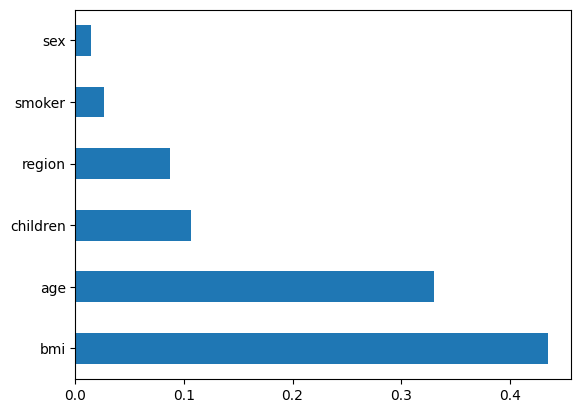

In [113]:
model = ExtraTreesClassifier()
model.fit(x_i,y_i)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=pd.DataFrame(x_i, columns=["age","sex","bmi","children","smoker","region"]).columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

**Top 3 insignificant features:**
1.   region 
2.   sex
3.   smoker





# Graph Charges vs Features

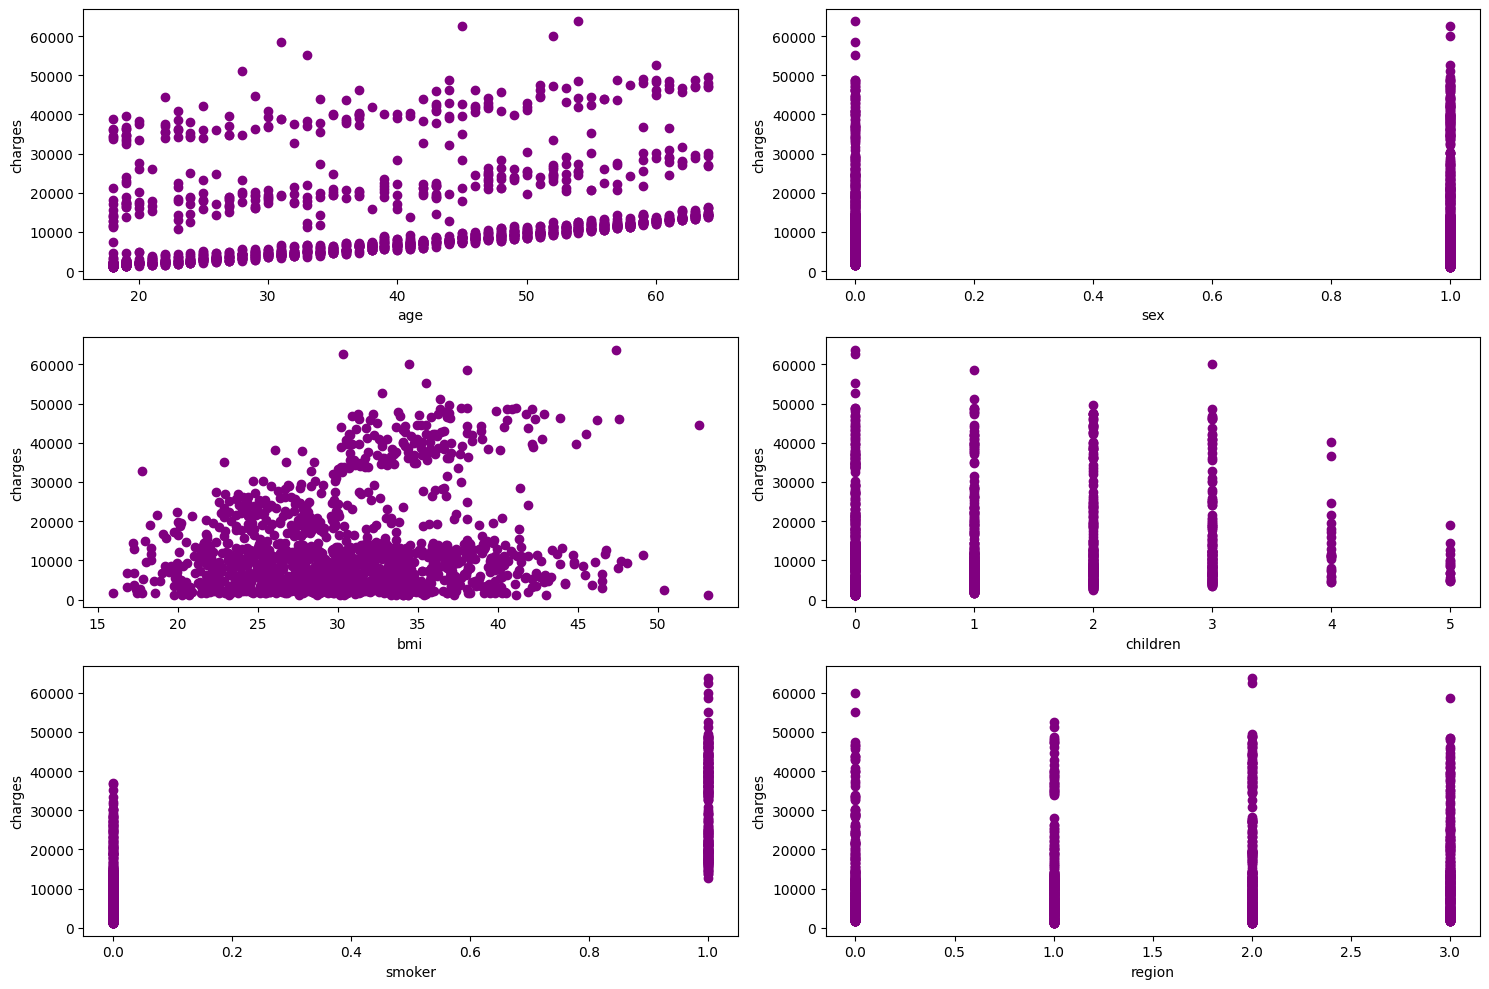

In [114]:
X_features = ["age", "sex", "bmi", "children", "smoker", "region"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

df['charges'] = pd.to_numeric(df['charges'], errors='coerce')  # Convert 'charges' column to numeric

df_cleaned = df.dropna(subset=['charges'])  

for i, feature in enumerate(X_features):
    axes[i].scatter(df_cleaned[feature], df_cleaned['charges'],color="purple")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('charges')

plt.tight_layout()
plt.show()

# Decision Tree Regression

In [120]:
Y_tree = df.iloc[1:, 6].values.reshape(-1, 1)
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(X, Y_tree, test_size=.3, random_state=42)

In [121]:
# class Node():
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
#         ''' constructor ''' 
        
#         # for decision node
#         self.feature_index = feature_index
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.var_red = var_red
        
#         # for leaf node
#         self.value = value

DecisionTreeRegressor Class

In [122]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
            #if best_split and "var_red" in best_split and best_split["var_red"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(dataset[:,-1])
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))

        return reduction
    
    def calculate_leaf_value(self, Y_tree):
        ''' function to compute leaf node '''
        
        val = np.mean(Y_tree)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y_tree):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y_tree), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]

        return preditions

In [123]:


regressor = DecisionTreeRegressor(min_samples_split=4, max_depth=4)
regressor.fit(x_train_tree,y_train_tree)
regressor.print_tree()

X_4 <= -0.5074630991436532 ? 88880573.94470625
 left:X_0 <= 0.19886311501306964 ? 12363683.42513036
  left:X_0 <= -1.2251606895761058 ? 1961858.4362664223
    left:X_3 <= -0.9086136674186784 ? 1647343.858980842
        left:X_5 <= 0.44051281721328645 ? 353432.2524446957
                left:2055.4558834920635
                right:3398.5837130434784
        right:X_2 <= 0.2840599367351902 ? 3545316.642680362
                left:4137.565276153846
                right:8445.683674444444
    right:X_3 <= -0.07876719164653397 ? 642489.7993203998
        left:X_0 <= -0.22834402636368298 ? 693983.9508971721
                left:5169.208416259542
                right:7040.810546326531
        right:X_5 <= 0.44051281721328645 ? 1820673.3120055944
                left:6473.743879750001
                right:9460.598283437499
  right:X_0 <= 0.9108750173076573 ? 2945161.3607584313
    left:X_0 <= 0.4836678759309047 ? 786594.6199445799
        left:X_5 <= -0.464872973003883 ? 1192750.5713265464


In [124]:
y_pred_tree = regressor.predict(x_test_tree) 
print("MSE  :",mean_squared_error(y_test_tree, y_pred_tree))

rmse_tree=np.sqrt(mean_squared_error(y_test_tree, y_pred_tree))
print("RMSE :",rmse_tree)

print("R^2  :", r2_score(y_test_tree, y_pred_tree))

MSE  : 20688516.91775201
RMSE : 4548.463138000791
R^2  : 0.8589011793822707


# Model Tuning

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Define the parameter grid for tuning
param_grid = {
    'min_samples_split': [2, 4, 6],
    'max_depth': [2, 4, 6]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(x_train_tree, y_train_tree)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_regressor = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_tree = best_regressor.predict(x_test_tree)

# Evaluate the model
mse = mean_squared_error(y_test_tree, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_tree, y_pred_tree)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)


Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 2}
MSE: 20761771.412831422
RMSE: 4556.5086867942455
R^2: 0.858401572624486


In [126]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'min_samples_split': [3],
    'max_depth': [3],
}

# Create an instance of the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(x_train_tree, y_train_tree)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_regressor = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_tree = best_regressor.predict(x_test_tree)

# Evaluate the model
mse = mean_squared_error(y_test_tree, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_tree, y_pred_tree)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)


Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 3}
MSE: 22877590.790484738
RMSE: 4783.05245533485
R^2: 0.8439713638273123


In [127]:
# Create a joblib file using serialization
import joblib
joblib.dump(best_regressor,'joblib_best_regressor')


['joblib_best_regressor']